In [1]:
import pandas as pd
import numpy as np

ad = pd.read_csv('actual_duration.csv')

# Sense-check the DataFrame
print("Column names:")
print(ad.columns)

print("Number of rows and columns:")
print(ad.shape)

print("Data types:")
print(ad.dtypes)

print("Number of missing values:")
print(ad.isnull().sum())

# Determine descriptive statistics
print("Descriptive statistics:")
print(ad.describe())

# Determine metadata
print("Metadata:")
print(ad.info())

Column names:
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
Number of rows and columns:
(137793, 8)
Data types:
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
Number of missing values:
sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64
Descriptive statistics:
       count_of_appointments
count          137793.000000
mean             1219.080011
std         

In [2]:
# Check for duplicates
duplicate_rows_ad = ad.duplicated()
num_duplicates_ad = duplicate_rows_ad.sum()
num_duplicates_ad

0

In [3]:
ar = pd.read_csv('appointments_regional.csv')

# Sense-check the DataFrame
print("Column names:")
print(ar.columns)

print("Number of rows and columns:")
print(ar.shape)

print("Data types:")
print(ar.dtypes)

print("Number of missing values:")
print(ar.isnull().sum())

# Determine descriptive statistics
print("Descriptive statistics:")
print(ar.describe())

# Determine metadata
print("Metadata:")
print(ar.info())

Column names:
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
Number of rows and columns:
(596821, 7)
Data types:
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
Number of missing values:
icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64
Descriptive statistics:
       count_of_appointments
count          596821.000000
mean             1244

In [14]:
# Check for duplicates
duplicate_rows_ar = ar.duplicated()
num_duplicates_ar = duplicate_rows_ar.sum()
num_duplicates_ar

21604

In [19]:
# Remove duplicates
ar.drop_duplicates(inplace=True)

In [4]:
nc = pd.read_excel('national_categories.xlsx')

# Sense-check the DataFrame
print("Column names:")
print(nc.columns)

print("Number of rows and columns:")
print(nc.shape)

print("Data types:")
print(nc.dtypes)

print("Number of missing values:")
print(nc.isnull().sum())

# Determine descriptive statistics
print("Descriptive statistics:")
print(nc.describe())

# Determine metadata
print("Metadata:")
print(nc.info())

Column names:
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
Number of rows and columns:
(817394, 8)
Data types:
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
Number of missing values:
appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64
Descriptive statistics:
                    appointment_date  count_of_appointments
count                         817394          817394.0

In [20]:
# Check for duplicates
duplicate_rows_nc = nc.duplicated()
num_duplicates_nc = duplicate_rows_nc.sum()
num_duplicates_nc

0

In [7]:
#How many locations are there in the data set?
num_locations = ad['sub_icb_location_name'].nunique()
print("Number of locations:", num_locations)

Number of locations: 106


In [5]:
#What are the five locations with the highest number of appointments?

# Group the data by 'sub_icb_location_name' and sum the appointments
location_appointments = nc.groupby('sub_icb_location_name')['count_of_appointments'].sum()

# Sort the groups in descending order based on the total appointments
location_appointments_sorted = location_appointments.sort_values(ascending=False)

# Select the top five locations
top_five_locations = location_appointments_sorted.head(5)

print("Top five locations with the highest number of appointments:")
print(top_five_locations)

Top five locations with the highest number of appointments:
sub_icb_location_name
NHS North West London ICB - W2U3Z              12142390
NHS North East London ICB - A3A8R               9588891
NHS Kent and Medway ICB - 91Q                   9286167
NHS Hampshire and Isle Of Wight ICB - D9Y0V     8288102
NHS South East London ICB - 72Q                 7850170
Name: count_of_appointments, dtype: int64


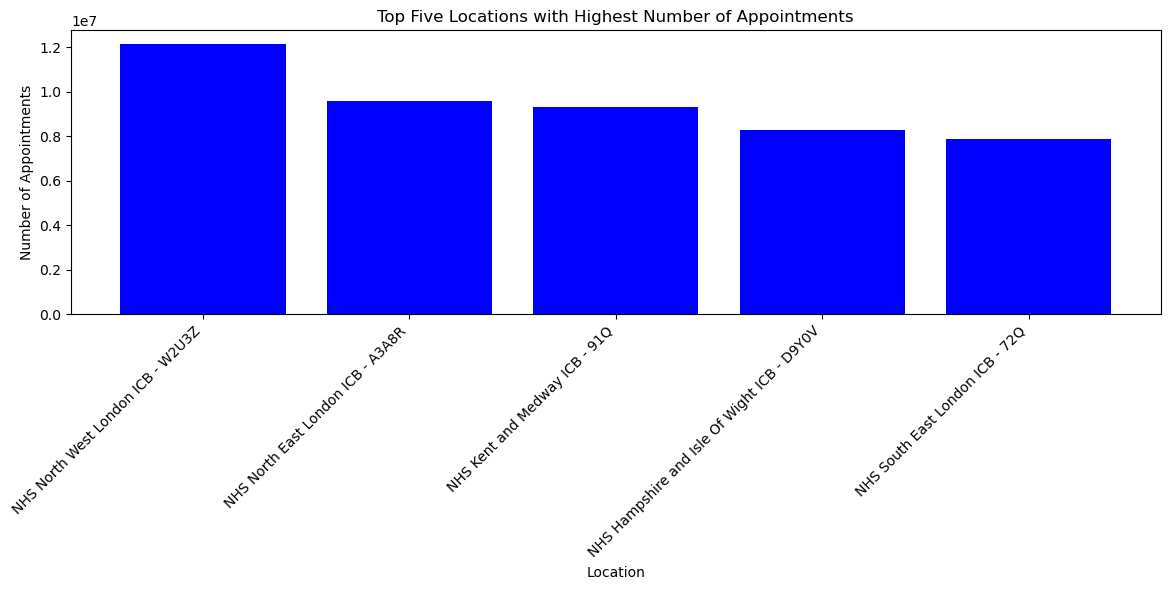

In [10]:
import matplotlib.pyplot as plt

# Plotting bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_five_locations.index, top_five_locations.values, color='blue')
plt.xlabel('Location')
plt.ylabel('Number of Appointments')
plt.title('Top Five Locations with Highest Number of Appointments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
#What are the five locations with the lowest number of appointments?

# Group the data by 'sub_icb_location_name' and sum the appointments
location_appointments = nc.groupby('sub_icb_location_name')['count_of_appointments'].sum()

# Sort the groups in descending order based on the total appointments
location_appointments_sorted = location_appointments.sort_values(ascending=True)

# Select the top five locations
bottom_five_locations = location_appointments_sorted.head(5)

print("Top five locations with the highest number of appointments:")
print(bottom_five_locations)

Top five locations with the highest number of appointments:
sub_icb_location_name
NHS Lancashire and South Cumbria ICB - 02G      554694
NHS Cheshire and Merseyside ICB - 01T           606606
NHS Greater Manchester ICB - 00V                639211
NHS Nottingham and Nottinghamshire ICB - 02Q    639660
NHS Cheshire and Merseyside ICB - 01V           641149
Name: count_of_appointments, dtype: int64


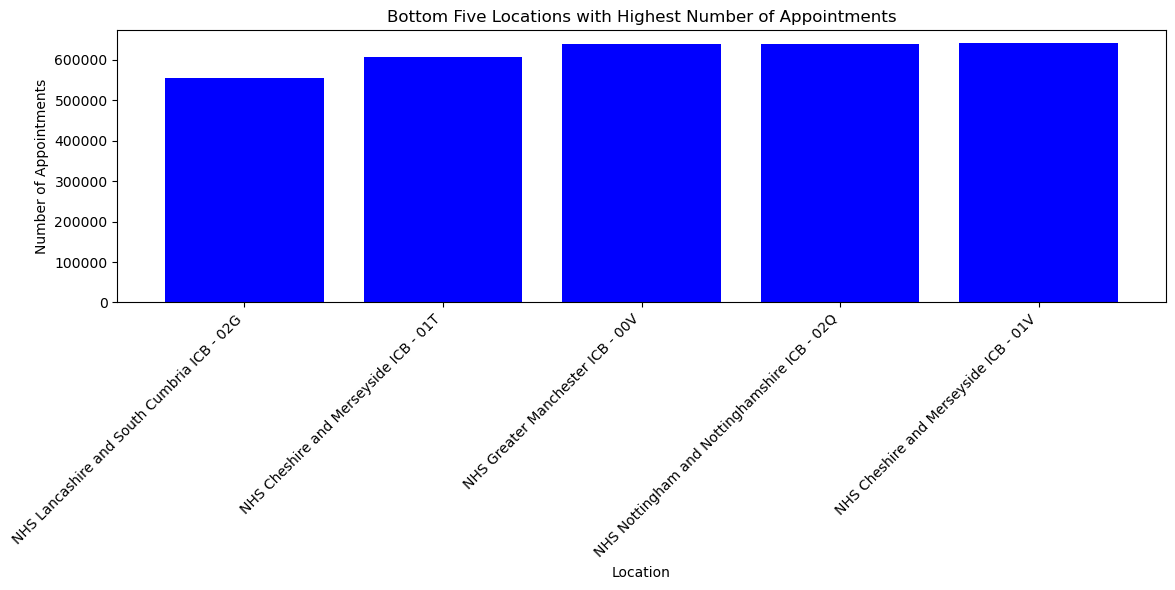

In [14]:
# Plotting bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_five_locations.index, bottom_five_locations.values, color='blue')
plt.xlabel('Location')
plt.ylabel('Number of Appointments')
plt.title('Bottom Five Locations with Highest Number of Appointments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
#How many service settings, context types, national categories, and appointment statuses are there?

# Find the number of service settings
num_service_settings = nc['service_setting'].value_counts().count()

# Find the number of context types
num_context_types = nc['context_type'].value_counts().count()

# Find the number of national categories
num_national_categories = nc['national_category'].value_counts().count()

# Find the number of appointment statuses
num_appointment_statuses = ar['appointment_status'].value_counts().count()

print("Number of service settings:", num_service_settings)
print("Number of context types:", num_context_types)
print("Number of national categories:", num_national_categories)
print("Number of appointment statuses:", num_appointment_statuses)

Number of service settings: 5
Number of context types: 3
Number of national categories: 18
Number of appointment statuses: 3


In [21]:
#Which service setting has the highest number of appointments?

# Group the data by 'sub_icb_location_name' and sum the appointments
service_setting_appointments = nc.groupby('service_setting')['count_of_appointments'].sum()

# Sort the groups in descending order based on the total appointments
service_setting_appointments_sorted = service_setting_appointments.sort_values(ascending=False)

# Select the top five service settings
top_five_service_setting = service_setting_appointments_sorted.head(5)

print("Top five service settings with the highest number of appointments:")
print(top_five_service_setting)

Top five service settings with the highest number of appointments:
service_setting
General Practice             270811691
Unmapped                      11080810
Primary Care Network           6557386
Other                          5420076
Extended Access Provision      2176807
Name: count_of_appointments, dtype: int64


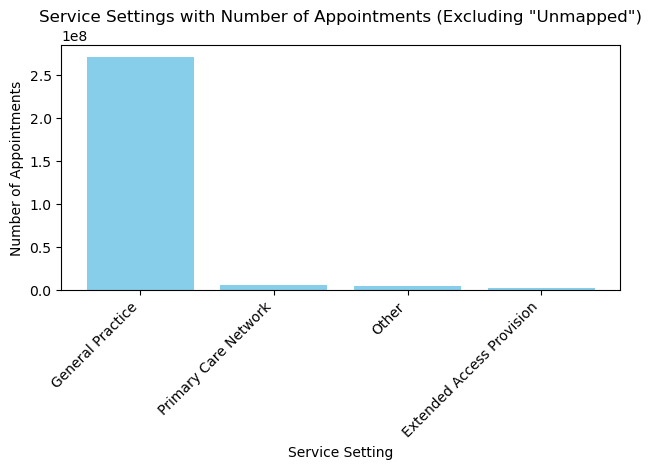

In [20]:
# Filtering out 'Unmapped' service setting
filtered_service_setting = service_setting_appointments_sorted.drop('Unmapped', errors='ignore')

# Select the top five service settings (excluding 'Unmapped')
top_five_service_setting = filtered_service_setting.head()

# Plotting bar chart
plt.bar(top_five_service_setting.index, top_five_service_setting.values, color='skyblue')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.title('Service Settings with Number of Appointments (Excluding "Unmapped")')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
#Which national categories has the highest number of appointments?

# Group the data by 'sub_icb_location_name' and sum the appointments
national_categories_appointments = nc.groupby('national_category')['count_of_appointments'].sum()

# Sort the groups in descending order based on the total appointments
national_catergoies_appointments_sorted = national_categories_appointments.sort_values(ascending=False)

# Select the top five national categories
top_five_national_categories = national_catergoies_appointments_sorted.head(5)

print("Top five service settings with the highest number of appointments:")
print(top_five_national_categories)

Top five service settings with the highest number of appointments:
national_category
General Consultation Routine    97271522
General Consultation Acute      53691150
Clinical Triage                 41546964
Planned Clinics                 28019748
Inconsistent Mapping            27890802
Name: count_of_appointments, dtype: int64


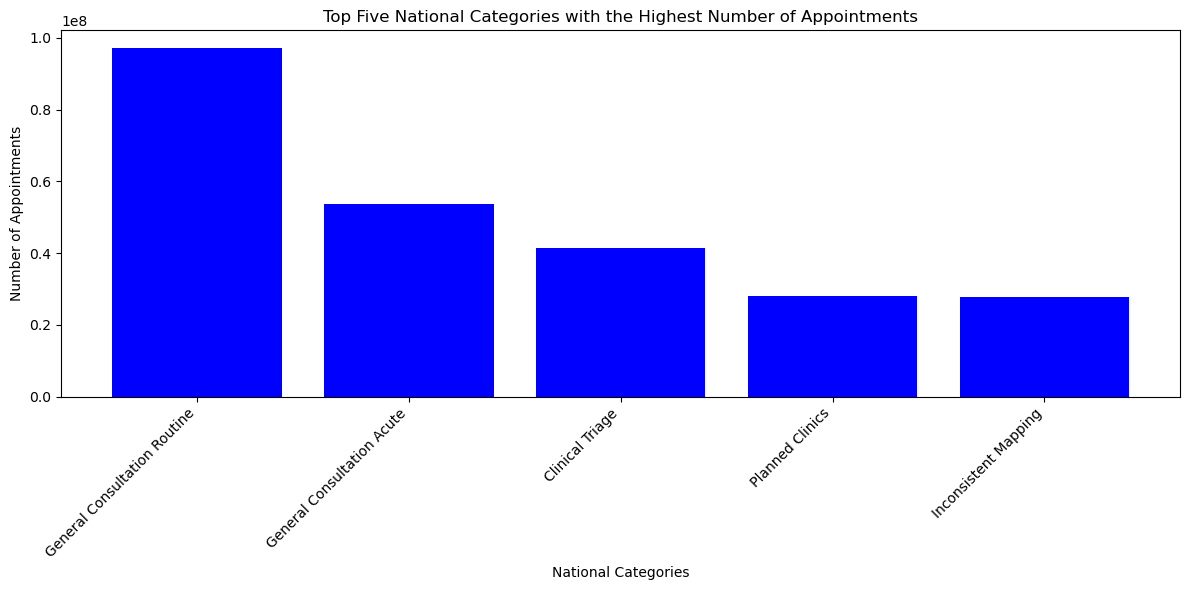

In [34]:
# Plotting bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_five_national_categories.index, top_five_national_categories.values, color='blue')
plt.xlabel('National Categories')
plt.ylabel('Number of Appointments')
plt.title('Top Five National Categories with the Highest Number of Appointments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [36]:
#Which national categories has the lowest number of appointments?

# Group the data by 'sub_icb_location_name' and sum the appointments
national_categories_appointments = nc.groupby('national_category')['count_of_appointments'].sum()

# Sort the groups in descending order based on the total appointments
national_categories_appointments_sorted = national_categories_appointments.sort_values(ascending=True)

# Select the bottom five national categories
bottom_five_national_categories = national_categories_appointments_sorted.head(5)

print("Bottom five service settings with the highest number of appointments:")
print(bottom_five_national_categories)

Bottom five service settings with the highest number of appointments:
national_category
Group Consultation and Group Education                                  60632
Non-contractual chargeable work                                        138911
Care Home Needs Assessment & Personalised Care and Support Planning    405904
Walk-in                                                                412438
Social Prescribing Service                                             475828
Name: count_of_appointments, dtype: int64


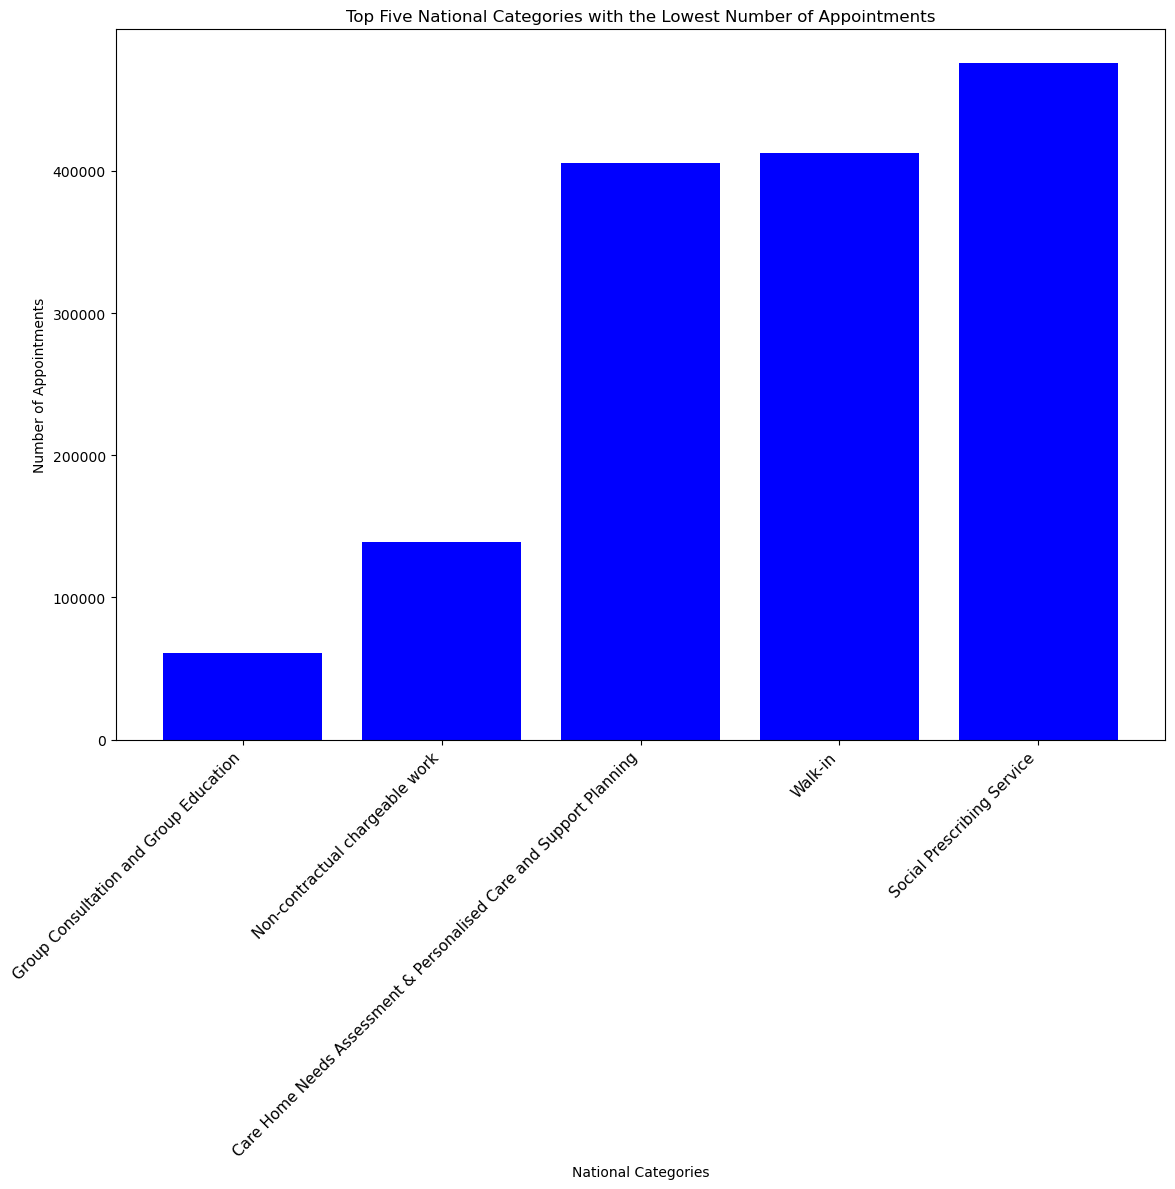

In [43]:
# Plotting bar chart
plt.figure(figsize=(12, 12))
plt.bar(bottom_five_national_categories.index, bottom_five_national_categories.values, color='blue')
plt.xlabel('National Categories')
plt.ylabel('Number of Appointments')
plt.title('Top Five National Categories with the Lowest Number of Appointments')
plt.xticks(rotation=45, ha='right', fontsize=11) 
plt.tight_layout()
plt.show()

In [30]:
#Which context types has the highest number of appointments?

# Group the data by 'sub_icb_location_name' and sum the appointments
context_types_appointments = nc.groupby('context_type')['count_of_appointments'].sum()

# Sort the groups in descending order based on the total appointments
context_types_appointments_sorted = context_types_appointments.sort_values(ascending=False)

# Select the top three context types
top_three_context_types = context_types_appointments_sorted.head(3)

print("Top Three service settings with the highest number of appointments:")
print(top_three_context_types)

Top Three service settings with the highest number of appointments:
context_type
Care Related Encounter    257075158
Inconsistent Mapping       27890802
Unmapped                   11080810
Name: count_of_appointments, dtype: int64
